# PLINK GWAS + visualization

Post commmon PCA QC

Filter SNPs MAF >= 0.05

#### User supplied variables

In [2]:
PLINKCMD = '/usr/local/bin/plink-1.90b6.9 '

PLINK_PREFIX = '/mnt/adsp/users/psp_hg38_wes/data/PLINK/filter2_post_common_QC/psp_adsp.common_PCA.pass_qc.maf_05'
DIR_ASSOC = '/mnt/adsp/users/psp_hg38_wes/data/PLINK/filter2_post_common_QC/GWAS/test_maf_05'
MODEL_NAME = 'psp_adsp.common_PCA.pass_qc.test_maf_05'


FILE_COVAR = '/mnt/adsp/users/psp_hg38_wes/data/cohort_files/fam_pheno_covar/psp_adsp.common_PCA.pass_qc.pheno.20504.2020.0626.txt'
# COVAR_STR = 'PC01,PC02,PC03'
# COVAR_STR = 'PC01,PC02,PC03,H1H2_dosage'


#### imports & setup derived variables

In [3]:
# !pip install qqman
from qqman import qqman
import os
import pandas as pd

file_plink_assoc = os.path.join(DIR_ASSOC, MODEL_NAME)
out_manhattan = os.path.join(DIR_ASSOC, MODEL_NAME+'.Manhattan.png')
out_qqplot = os.path.join(DIR_ASSOC, MODEL_NAME+'.qqplot.png')

<br>  

### Run PLINK GWAS

In [4]:
!mkdir -p {DIR_ASSOC}

In [5]:
## --assoc
!{PLINKCMD} --bfile {PLINK_PREFIX} \
        --assoc \
        --out {file_plink_assoc+'.assoc._no_covar'} 


PLINK v1.90b6.9 64-bit (4 Mar 2019)            www.cog-genomics.org/plink/1.9/
(C) 2005-2019 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /mnt/adsp/users/psp_hg38_wes/data/PLINK/filter2_post_common_QC/GWAS/test_maf_05/psp_adsp.common_PCA.pass_qc.test_maf_05.assoc._no_covar.log.
Options in effect:
  --assoc
  --bfile /mnt/adsp/users/psp_hg38_wes/data/PLINK/filter2_post_common_QC/psp_adsp.common_PCA.pass_qc.maf_05
  --out /mnt/adsp/users/psp_hg38_wes/data/PLINK/filter2_post_common_QC/GWAS/test_maf_05/psp_adsp.common_PCA.pass_qc.test_maf_05.assoc._no_covar

245854 MB RAM detected; reserving 122927 MB for main workspace.
27079 variants loaded from .bim file.
4746 people (2030 males, 2716 females) loaded from .fam.
4746 phenotype values loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 4746 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333

In [5]:
## --logistic v0: no covar
!{PLINKCMD} --bfile {PLINK_PREFIX} \
            --logistic hide-covar \
            --pfilter 1 \
            --out {file_plink_assoc+'.logistic._no_covar'} 


PLINK v1.90b6.9 64-bit (4 Mar 2019)            www.cog-genomics.org/plink/1.9/
(C) 2005-2019 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /mnt/adsp/users/psp_hg38_wes/data/PLINK/filter2_post_common_QC/GWAS/test_maf_05/psp_adsp.common_PCA.pass_qc.test_maf_05.logistic._no_covar.log.
Options in effect:
  --bfile /mnt/adsp/users/psp_hg38_wes/data/PLINK/filter2_post_common_QC/psp_adsp.common_PCA.pass_qc.maf_05
  --logistic hide-covar
  --out /mnt/adsp/users/psp_hg38_wes/data/PLINK/filter2_post_common_QC/GWAS/test_maf_05/psp_adsp.common_PCA.pass_qc.test_maf_05.logistic._no_covar
  --pfilter 1

245854 MB RAM detected; reserving 122927 MB for main workspace.
27079 variants loaded from .bim file.
4746 people (2030 males, 2716 females) loaded from .fam.
4746 phenotype values loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 4746 founders and 0 nonfounders present.
Calculating allele frequencies... 101112131415161

In [6]:
## --logistic v1: covar = PC1
!{PLINKCMD} --bfile {PLINK_PREFIX} \
            --logistic hide-covar \
            --pfilter 1 \
            --covar {FILE_COVAR} --covar-name PC01 \
            --out {file_plink_assoc+'.logistic.covar_PC1'} 

PLINK v1.90b6.9 64-bit (4 Mar 2019)            www.cog-genomics.org/plink/1.9/
(C) 2005-2019 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /mnt/adsp/users/psp_hg38_wes/data/PLINK/filter2_post_common_QC/GWAS/test_maf_05/psp_adsp.common_PCA.pass_qc.test_maf_05.logistic.covar_PC1.log.
Options in effect:
  --bfile /mnt/adsp/users/psp_hg38_wes/data/PLINK/filter2_post_common_QC/psp_adsp.common_PCA.pass_qc.maf_05
  --covar /mnt/adsp/users/psp_hg38_wes/data/cohort_files/fam_pheno_covar/psp_adsp.common_PCA.pass_qc.pheno.20504.2020.0626.txt
  --covar-name PC01
  --logistic hide-covar
  --out /mnt/adsp/users/psp_hg38_wes/data/PLINK/filter2_post_common_QC/GWAS/test_maf_05/psp_adsp.common_PCA.pass_qc.test_maf_05.logistic.covar_PC1
  --pfilter 1

245854 MB RAM detected; reserving 122927 MB for main workspace.
27079 variants loaded from .bim file.
4746 people (2030 males, 2716 females) loaded from .fam.
4746 phenotype values loaded from .fam.
Using 1 thread (no multithre

In [7]:
## --logistic v2: covar = PC1,PC2
!{PLINKCMD} --bfile {PLINK_PREFIX} \
            --logistic hide-covar \
            --pfilter 1 \
            --covar {FILE_COVAR} --covar-name PC01,PC02 \
            --out {file_plink_assoc+'.logistic.covar_PC1-PC2'} 

PLINK v1.90b6.9 64-bit (4 Mar 2019)            www.cog-genomics.org/plink/1.9/
(C) 2005-2019 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /mnt/adsp/users/psp_hg38_wes/data/PLINK/filter2_post_common_QC/GWAS/test_maf_05/psp_adsp.common_PCA.pass_qc.test_maf_05.logistic.covar_PC1-PC2.log.
Options in effect:
  --bfile /mnt/adsp/users/psp_hg38_wes/data/PLINK/filter2_post_common_QC/psp_adsp.common_PCA.pass_qc.maf_05
  --covar /mnt/adsp/users/psp_hg38_wes/data/cohort_files/fam_pheno_covar/psp_adsp.common_PCA.pass_qc.pheno.20504.2020.0626.txt
  --covar-name PC01,PC02
  --logistic hide-covar
  --out /mnt/adsp/users/psp_hg38_wes/data/PLINK/filter2_post_common_QC/GWAS/test_maf_05/psp_adsp.common_PCA.pass_qc.test_maf_05.logistic.covar_PC1-PC2
  --pfilter 1

245854 MB RAM detected; reserving 122927 MB for main workspace.
27079 variants loaded from .bim file.
4746 people (2030 males, 2716 females) loaded from .fam.
4746 phenotype values loaded from .fam.
Using 1 thread 

In [8]:
## --logistic v3: covar = PC1,PC2,PC3
!{PLINKCMD} --bfile {PLINK_PREFIX} \
            --logistic hide-covar \
            --pfilter 1 \
            --covar {FILE_COVAR} --covar-name PC01,PC02,PC03 \
            --out {file_plink_assoc+'.logistic.covar_PC1-PC2-PC3'} 


PLINK v1.90b6.9 64-bit (4 Mar 2019)            www.cog-genomics.org/plink/1.9/
(C) 2005-2019 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /mnt/adsp/users/psp_hg38_wes/data/PLINK/filter2_post_common_QC/GWAS/test_maf_05/psp_adsp.common_PCA.pass_qc.test_maf_05.logistic.covar_PC1-PC2-PC3.log.
Options in effect:
  --bfile /mnt/adsp/users/psp_hg38_wes/data/PLINK/filter2_post_common_QC/psp_adsp.common_PCA.pass_qc.maf_05
  --covar /mnt/adsp/users/psp_hg38_wes/data/cohort_files/fam_pheno_covar/psp_adsp.common_PCA.pass_qc.pheno.20504.2020.0626.txt
  --covar-name PC01,PC02,PC03
  --logistic hide-covar
  --out /mnt/adsp/users/psp_hg38_wes/data/PLINK/filter2_post_common_QC/GWAS/test_maf_05/psp_adsp.common_PCA.pass_qc.test_maf_05.logistic.covar_PC1-PC2-PC3
  --pfilter 1

245854 MB RAM detected; reserving 122927 MB for main workspace.
27079 variants loaded from .bim file.
4746 people (2030 males, 2716 females) loaded from .fam.
4746 phenotype values loaded from .fam.
Us

In [9]:
## --logistic v4: covar = PC1,PC2,PC3,H1H2
!{PLINKCMD} --bfile {PLINK_PREFIX} \
            --logistic hide-covar \
            --pfilter 1 \
            --covar {FILE_COVAR} --covar-name PC01,PC02,PC03,H1H2_dosage \
            --out {file_plink_assoc+'.logistic.covar_PC1-PC2-PC3-H1H2'} 


PLINK v1.90b6.9 64-bit (4 Mar 2019)            www.cog-genomics.org/plink/1.9/
(C) 2005-2019 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /mnt/adsp/users/psp_hg38_wes/data/PLINK/filter2_post_common_QC/GWAS/test_maf_05/psp_adsp.common_PCA.pass_qc.test_maf_05.logistic.covar_PC1-PC2-PC3-H1H2.log.
Options in effect:
  --bfile /mnt/adsp/users/psp_hg38_wes/data/PLINK/filter2_post_common_QC/psp_adsp.common_PCA.pass_qc.maf_05
  --covar /mnt/adsp/users/psp_hg38_wes/data/cohort_files/fam_pheno_covar/psp_adsp.common_PCA.pass_qc.pheno.20504.2020.0626.txt
  --covar-name PC01,PC02,PC03,H1H2_dosage
  --logistic hide-covar
  --out /mnt/adsp/users/psp_hg38_wes/data/PLINK/filter2_post_common_QC/GWAS/test_maf_05/psp_adsp.common_PCA.pass_qc.test_maf_05.logistic.covar_PC1-PC2-PC3-H1H2
  --pfilter 1

245854 MB RAM detected; reserving 122927 MB for main workspace.
27079 variants loaded from .bim file.
4746 people (2030 males, 2716 females) loaded from .fam.
4746 phenotype value

<br>  

# Visualize GWAS

## Manhattan plot

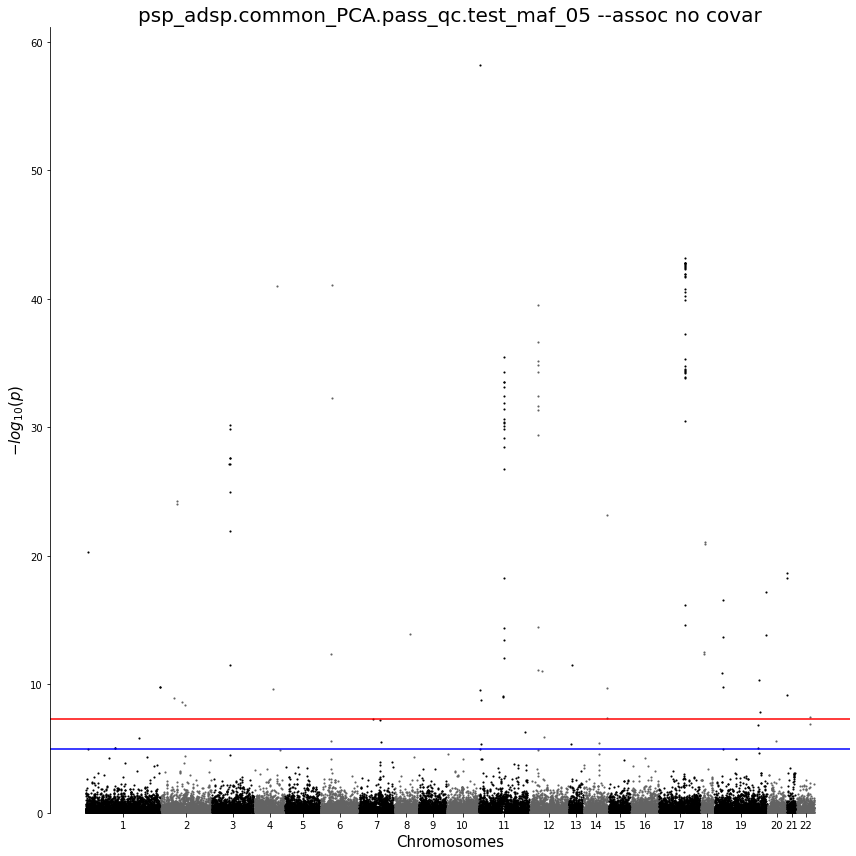

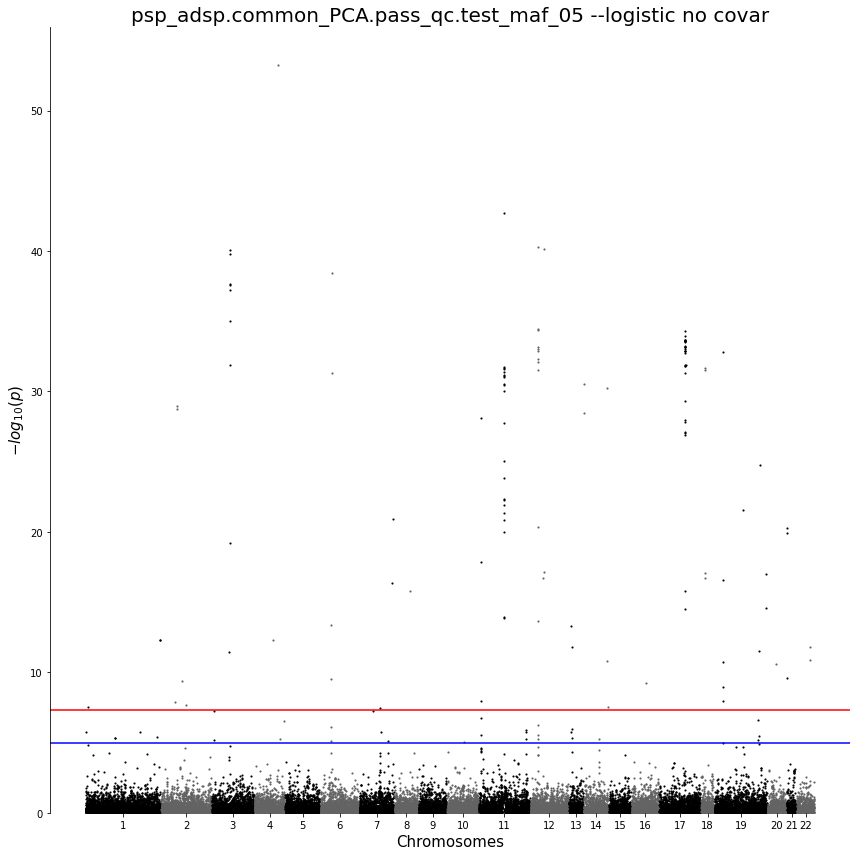

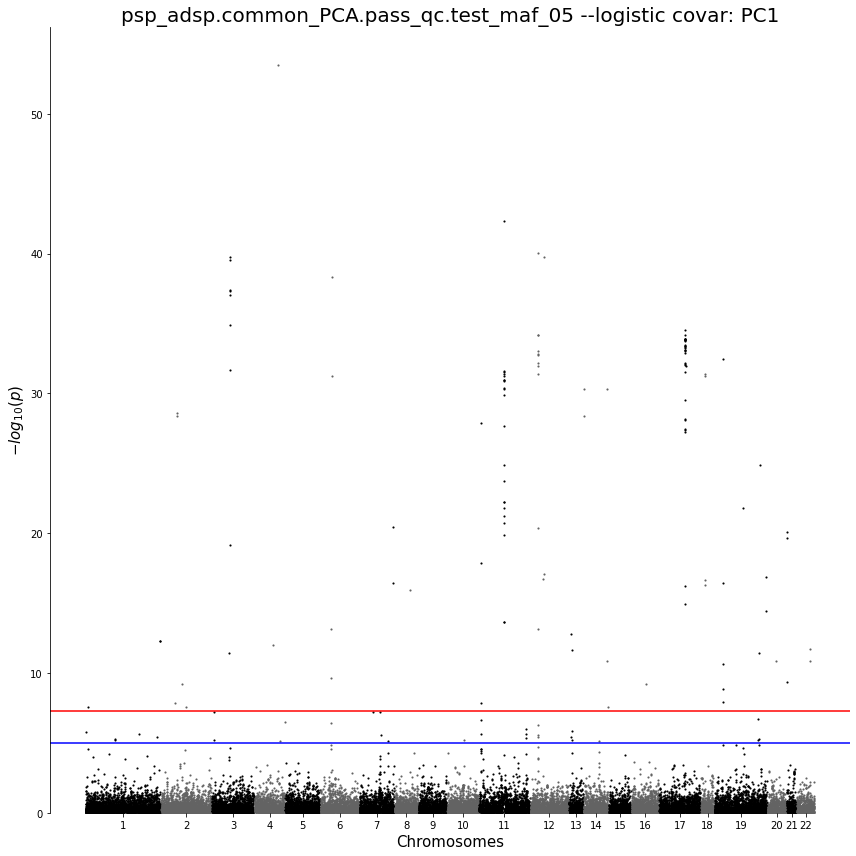

ValueError: min() arg is an empty sequence

In [10]:
## --assoc
qqman.manhattan(file_plink_assoc+'.assoc._no_covar.assoc', 
                out=os.path.join(DIR_ASSOC, MODEL_NAME+'.assoc._no_covar.Manhattan.png'), 
                show=True, 
                title=MODEL_NAME + ' --assoc no covar')

## --logistic v0: no covar
qqman.manhattan(file_plink_assoc+'.logistic._no_covar.assoc.logistic', 
                out=os.path.join(DIR_ASSOC, MODEL_NAME+'.logistic._no_covar.Manhattan.png'), 
                show=True, 
                title=MODEL_NAME + ' --logistic no covar')

## --logistic v1: covar = PC1
qqman.manhattan(file_plink_assoc+'.logistic.covar_PC1.assoc.logistic', 
                out=os.path.join(DIR_ASSOC, MODEL_NAME+'.logistic.covar_PC1.Manhattan.png'), 
                show=True, 
                title=MODEL_NAME + ' --logistic covar: PC1')

## --logistic v2: covar = PC1,PC2
qqman.manhattan(file_plink_assoc+'.logistic.covar_PC1-PC2.assoc.logistic', 
                out=os.path.join(DIR_ASSOC, MODEL_NAME+'.logistic.covar_PC1-PC2.Manhattan.png'), 
                show=True, 
                title=MODEL_NAME + ' --logistic covar: PC1,PC2')

## --logistic v3: covar = PC1,PC2,PC3
qqman.manhattan(file_plink_assoc+'.logistic.covar_PC1-PC2-PC3.assoc.logistic', 
                out=os.path.join(DIR_ASSOC, MODEL_NAME+'.logistic.covar_PC1-PC2-PC3.Manhattan.png'), 
                show=True, 
                title=MODEL_NAME + ' --logistic covar: PC1,PC2,PC3')

## --logistic v4: covar = PC1,PC2,PC3,H1H2
qqman.manhattan(file_plink_assoc+'.logistic.covar_PC1-PC2-PC3-H1H2.assoc.logistic', 
                out=os.path.join(DIR_ASSOC, MODEL_NAME+'.logistic.covar_PC1-PC2-PC3-H1H2.Manhattan.png'), 
                show=True, 
                title=MODEL_NAME + ' --logistic covar: PC1,PC2,PC3,H1H2')


## <font color='red'> _NOTE: when PC2 (+) included as covar --> ALL SNPs have `P = NA` in .assoc.logistic_

<br>  

## qqplot

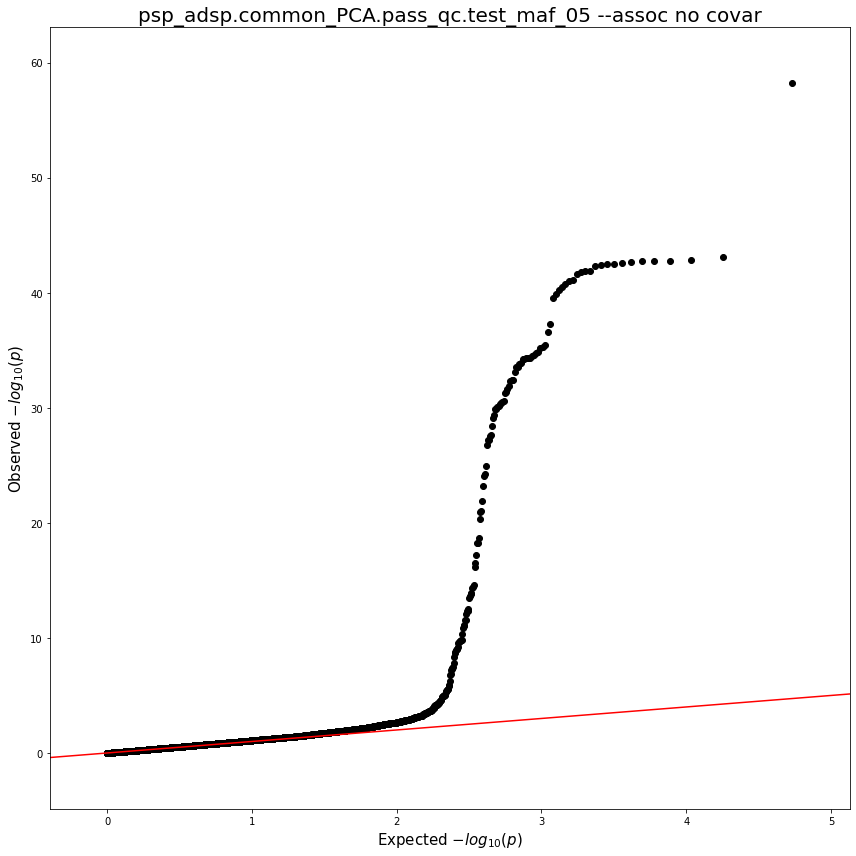

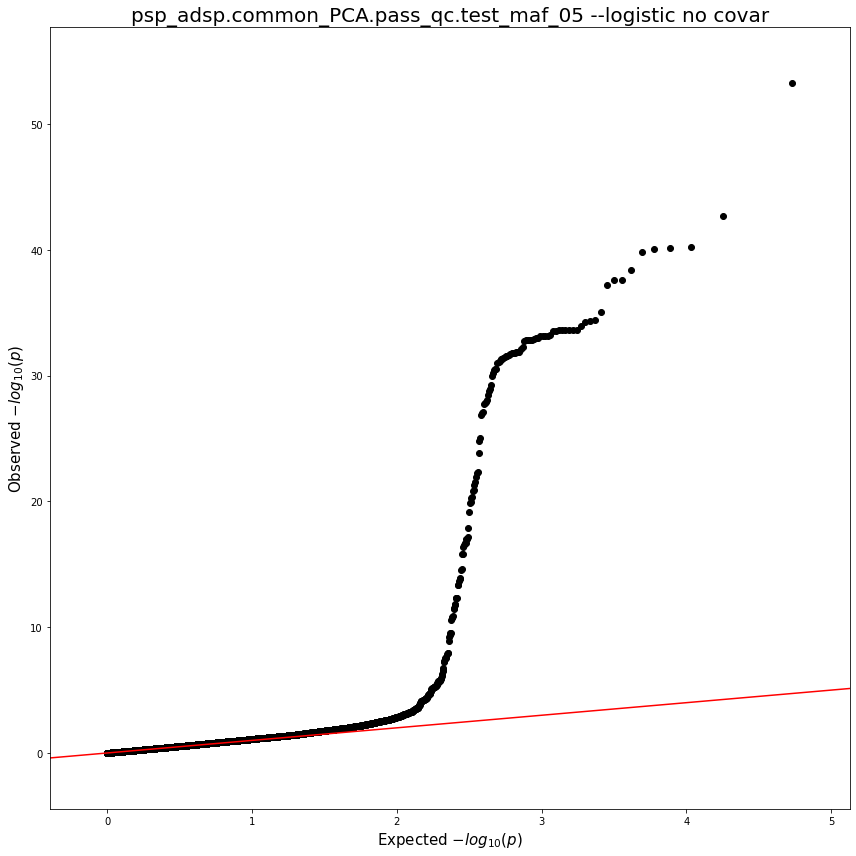

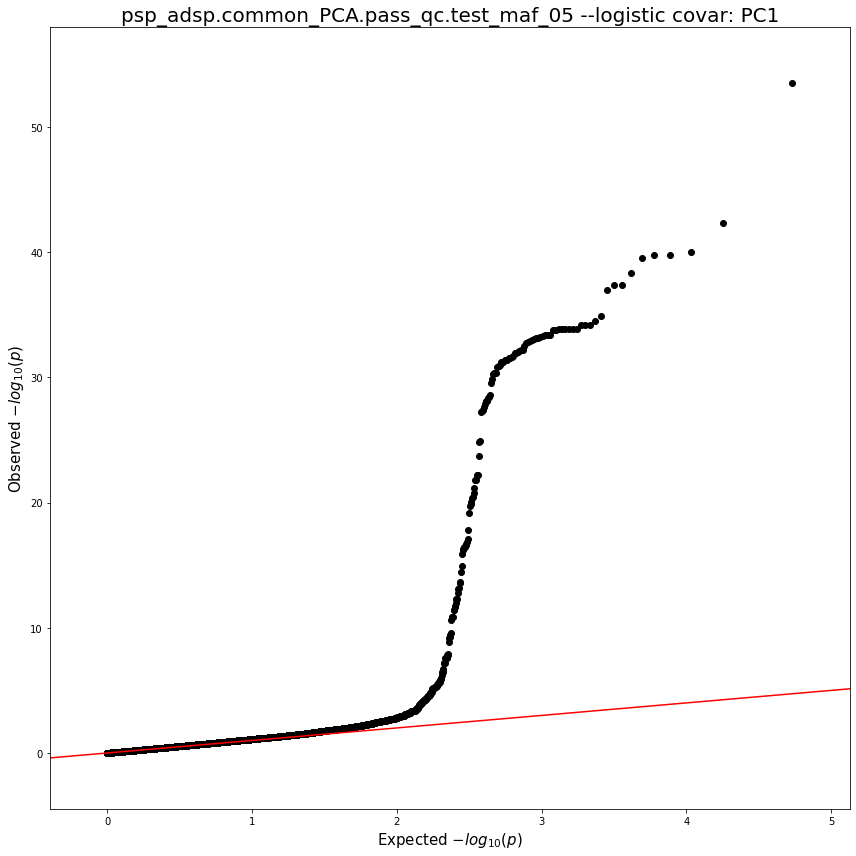

ValueError: zero-size array to reduction operation fmax which has no identity

In [11]:
## --assoc
qqman.qqplot(file_plink_assoc+'.assoc._no_covar.assoc', 
                out=os.path.join(DIR_ASSOC, MODEL_NAME+'.assoc._no_covar.qqplot.png'), 
                show=True, 
                title=MODEL_NAME + ' --assoc no covar')


## --logistic v0: no covar
df_assoc = pd.read_csv(file_plink_assoc+'.logistic._no_covar.assoc.logistic', header=0, delim_whitespace=True)
pval_no_covar = list(df_assoc['P'])
del df_assoc

qqman.qqplot(pval_no_covar, 
                out=os.path.join(DIR_ASSOC, MODEL_NAME+'.logistic._no_covar.qqplot.png'), 
                show=True, 
                title=MODEL_NAME + ' --logistic no covar')


## --logistic v1: covar = PC1
df_assoc = pd.read_csv(file_plink_assoc+'.logistic.covar_PC1.assoc.logistic', header=0, delim_whitespace=True)
pval_PC1 = list(df_assoc['P'])
del df_assoc

qqman.qqplot(pval_PC1, 
                out=os.path.join(DIR_ASSOC, MODEL_NAME+'.logistic.covar_PC1.qqplot.png'), 
                show=True, 
                title=MODEL_NAME + ' --logistic covar: PC1')


## --logistic v2: covar = PC1,PC2
df_assoc = pd.read_csv(file_plink_assoc+'.logistic.covar_PC1-PC2.assoc.logistic', header=0, delim_whitespace=True)
pval_PC1_PC2 = list(df_assoc['P'])
del df_assoc

qqman.qqplot(pval_PC1_PC2, 
                out=os.path.join(DIR_ASSOC, MODEL_NAME+'.logistic.covar_PC1-PC2.qqplot.png'), 
                show=True, 
                title=MODEL_NAME + ' --logistic covar: PC1,PC2')


## --logistic v3: covar = PC1,PC2,PC3
df_assoc = pd.read_csv(file_plink_assoc+'.logistic.covar_PC1-PC2-PC3.assoc.logistic', header=0, delim_whitespace=True)
pval_PC1_PC2_PC3 = list(df_assoc['P'])
del df_assoc

qqman.qqplot(pval_PC1_PC2_PC3, 
                out=os.path.join(DIR_ASSOC, MODEL_NAME+'.logistic.covar_PC1-PC2-PC3.qqplot.png'), 
                show=True, 
                title=MODEL_NAME + ' --logistic covar: PC1,PC2,PC3')


## --logistic v4: covar = PC1,PC2,PC3,H1H2
df_assoc = pd.read_csv(file_plink_assoc+'.logistic.covar_PC1-PC2-PC3-H1H2.assoc.logistic', header=0, delim_whitespace=True)
pval_PC1_PC2_PC3_H1H2 = list(df_assoc['P'])
del df_assoc

qqman.qqplot(pval_PC1_PC2_PC3_H1H2, 
                out=os.path.join(DIR_ASSOC, MODEL_NAME+'.logistic.covar_PC1-PC2-PC3-H1H2.qqplot.png'), 
                show=True, 
                title=MODEL_NAME + ' --logistic covar: PC1,PC2,PC3,H1H2')


## <font color='red'> _NOTE: when PC2 (+) included as covar --> ALL SNPs have `P = NA` in .assoc.logistic_

#### write plot files

In [12]:
## --assoc
qqman.manhattan(file_plink_assoc+'.assoc._no_covar.assoc', 
                out=os.path.join(DIR_ASSOC, MODEL_NAME+'.assoc._no_covar.Manhattan.png'), 
                show=False, 
                title=MODEL_NAME + ' --assoc no covar')

## --logistic v0: no covar
qqman.manhattan(file_plink_assoc+'.logistic._no_covar.assoc.logistic', 
                out=os.path.join(DIR_ASSOC, MODEL_NAME+'.logistic._no_covar.Manhattan.png'), 
                show=False, 
                title=MODEL_NAME + ' --logistic no covar')

## --logistic v1: covar = PC1
qqman.manhattan(file_plink_assoc+'.logistic.covar_PC1.assoc.logistic', 
                out=os.path.join(DIR_ASSOC, MODEL_NAME+'.logistic.covar_PC1.Manhattan.png'), 
                show=False, 
                title=MODEL_NAME + ' --logistic covar: PC1')

# ## --logistic v2: covar = PC1,PC2
# qqman.manhattan(file_plink_assoc+'.logistic.covar_PC1-PC2.assoc.logistic', 
#                 out=os.path.join(DIR_ASSOC, MODEL_NAME+'.logistic.covar_PC1-PC2.Manhattan.png'), 
#                 show=False, 
#                 title=MODEL_NAME + ' --logistic covar: PC1,PC2')

# ## --logistic v3: covar = PC1,PC2,PC3
# qqman.manhattan(file_plink_assoc+'.logistic.covar_PC1-PC2-PC3.assoc.logistic', 
#                 out=os.path.join(DIR_ASSOC, MODEL_NAME+'.logistic.covar_PC1-PC2-PC3.Manhattan.png'), 
#                 show=False, 
#                 title=MODEL_NAME + ' --logistic covar: PC1,PC2,PC3')

# ## --logistic v4: covar = PC1,PC2,PC3,H1H2
# qqman.manhattan(file_plink_assoc+'.logistic.covar_PC1-PC2-PC3-H1H2.assoc.logistic', 
#                 out=os.path.join(DIR_ASSOC, MODEL_NAME+'.logistic.covar_PC1-PC2-PC3-H1H2.Manhattan.png'), 
#                 show=False, 
#                 title=MODEL_NAME + ' --logistic covar: PC1,PC2,PC3,H1H2')


In [13]:
## --assoc
qqman.qqplot(file_plink_assoc+'.assoc._no_covar.assoc', 
                out=os.path.join(DIR_ASSOC, MODEL_NAME+'.assoc._no_covar.qqplot.png'), 
                show=False, 
                title=MODEL_NAME + ' --assoc no covar')


## --logistic v0: no covar
df_assoc = pd.read_csv(file_plink_assoc+'.logistic._no_covar.assoc.logistic', header=0, delim_whitespace=True)
pval_no_covar = list(df_assoc['P'])
del df_assoc

qqman.qqplot(pval_no_covar, 
                out=os.path.join(DIR_ASSOC, MODEL_NAME+'.logistic._no_covar.qqplot.png'), 
                show=False, 
                title=MODEL_NAME + ' --logistic no covar')


## --logistic v1: covar = PC1
df_assoc = pd.read_csv(file_plink_assoc+'.logistic.covar_PC1.assoc.logistic', header=0, delim_whitespace=True)
pval_PC1 = list(df_assoc['P'])
del df_assoc

qqman.qqplot(pval_PC1, 
                out=os.path.join(DIR_ASSOC, MODEL_NAME+'.logistic.covar_PC1.qqplot.png'), 
                show=False, 
                title=MODEL_NAME + ' --logistic covar: PC1')


# ## --logistic v2: covar = PC1,PC2
# df_assoc = pd.read_csv(file_plink_assoc+'.logistic.covar_PC1-PC2.assoc.logistic', header=0, delim_whitespace=True)
# pval_PC1_PC2 = list(df_assoc['P'])
# del df_assoc

# qqman.qqplot(pval_PC1_PC2, 
#                 out=os.path.join(DIR_ASSOC, MODEL_NAME+'.logistic.covar_PC1-PC2.qqplot.png'), 
#                 show=False, 
#                 title=MODEL_NAME + ' --logistic covar: PC1,PC2')


# ## --logistic v3: covar = PC1,PC2,PC3
# df_assoc = pd.read_csv(file_plink_assoc+'.logistic.covar_PC1-PC2-PC3.assoc.logistic', header=0, delim_whitespace=True)
# pval_PC1_PC2_PC3 = list(df_assoc['P'])
# del df_assoc

# qqman.qqplot(pval_PC1_PC2_PC3, 
#                 out=os.path.join(DIR_ASSOC, MODEL_NAME+'.logistic.covar_PC1-PC2-PC3.qqplot.png'), 
#                 show=False, 
#                 title=MODEL_NAME + ' --logistic covar: PC1,PC2,PC3')


# ## --logistic v4: covar = PC1,PC2,PC3,H1H2
# df_assoc = pd.read_csv(file_plink_assoc+'.logistic.covar_PC1-PC2-PC3-H1H2.assoc.logistic', header=0, delim_whitespace=True)
# pval_PC1_PC2_PC3_H1H2 = list(df_assoc['P'])
# del df_assoc

# qqman.qqplot(pval_PC1_PC2_PC3_H1H2, 
#                 out=os.path.join(DIR_ASSOC, MODEL_NAME+'.logistic.covar_PC1-PC2-PC3-H1H2.qqplot.png'), 
#                 show=False, 
#                 title=MODEL_NAME + ' --logistic covar: PC1,PC2,PC3,H1H2')
